In [8]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并构建图
file_path = './facebook_combined.txt'
G = nx.read_edgelist(file_path, nodetype=int)

# 图的基本信息
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / num_nodes

# 计算每个节点的度和邻居的平均度数
degree_data = {
    "Node": [],
    "Degree": [],
    "Avg_Neighbor_Degree": []
}

for node in G.nodes():
    degree_data["Node"].append(node)
    degree_data["Degree"].append(G.degree[node])
    avg_neighbor_degree = (
        sum(G.degree(neighbor) for neighbor in G.neighbors(node)) / G.degree[node]
        if G.degree[node] > 0 else 0
    )
    degree_data["Avg_Neighbor_Degree"].append(avg_neighbor_degree)

# 转为 DataFrame
degree_df = pd.DataFrame(degree_data)

# 统计朋友悖论比例
friendship_paradox = (degree_df["Avg_Neighbor_Degree"] > degree_df["Degree"]).mean()

# 准备结果总结
graph_summary = {
    "Number of Nodes": num_nodes,
    "Number of Edges": num_edges,
    "Average Degree": average_degree,
    "Friendship Paradox Proportion": friendship_paradox
}

# 显示图的统计信息和朋友悖论结果
import ace_tools as tools; tools.display_dataframe_to_user(name="Facebook Network Degree Data", dataframe=degree_df)
graph_summary


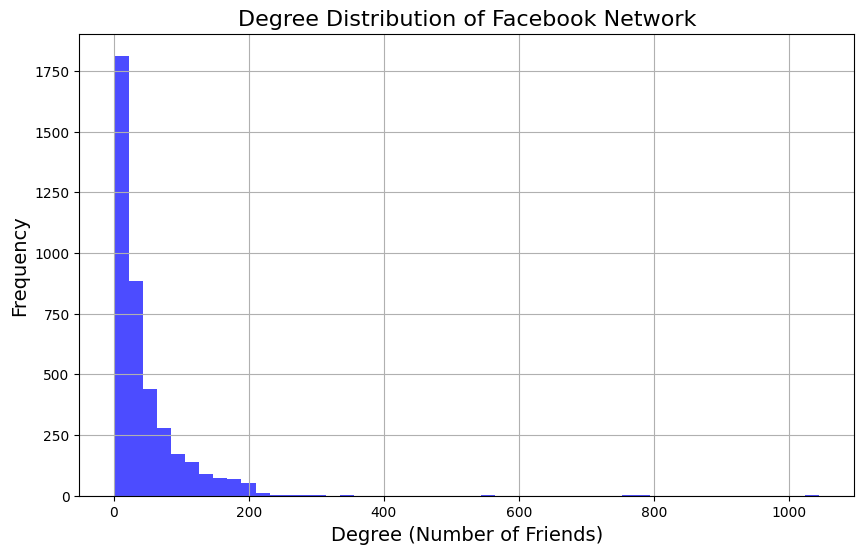

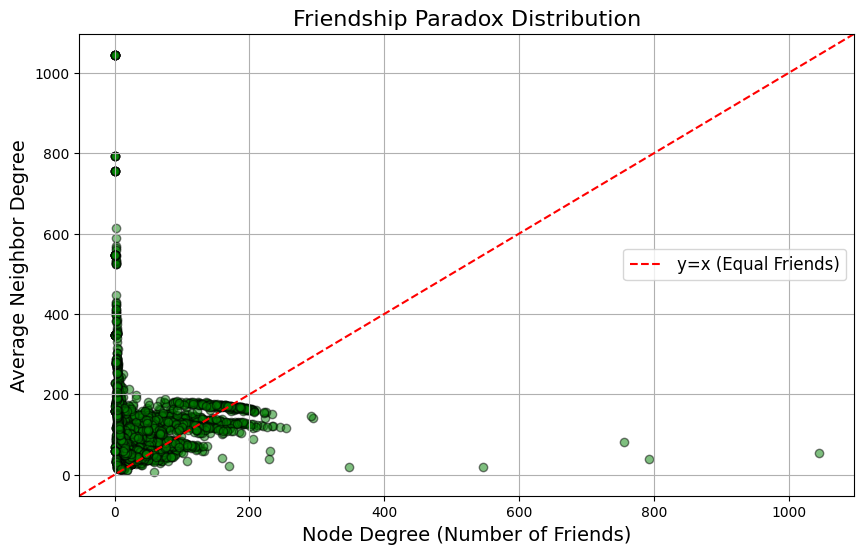

In [9]:
# 绘制度分布图
plt.figure(figsize=(10, 6))
degree_values = [G.degree(node) for node in G.nodes()]
plt.hist(degree_values, bins=50, color='blue', alpha=0.7)
plt.title("Degree Distribution of Facebook Network", fontsize=16)
plt.xlabel("Degree (Number of Friends)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# 绘制朋友悖论分布图
plt.figure(figsize=(10, 6))
plt.scatter(degree_df["Degree"], degree_df["Avg_Neighbor_Degree"], alpha=0.5, color='green', edgecolor='k')
plt.title("Friendship Paradox Distribution", fontsize=16)
plt.xlabel("Node Degree (Number of Friends)", fontsize=14)
plt.ylabel("Average Neighbor Degree", fontsize=14)
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="y=x (Equal Friends)")
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# 分层分析：将节点按照度分为不同的组，并分析每组中朋友悖论的比例

# 定义度的分层区间
bins = [0, 10, 20, 50, 100, 200, max(degree_df["Degree"]) + 1]
labels = ["0-10", "10-20", "20-50", "50-100", "100-200", "200+"]
degree_df["Degree_Bin"] = pd.cut(degree_df["Degree"], bins=bins, labels=labels, right=False)

# 计算每个分组的朋友悖论比例
bin_analysis = degree_df.groupby("Degree_Bin").apply(
    lambda df: pd.Series({
        "Total Nodes": len(df),
        "Friendship Paradox Proportion": (df["Avg_Neighbor_Degree"] > df["Degree"]).mean()
    })
).reset_index()

# 展示结果
import ace_tools as tools; tools.display_dataframe_to_user(name="Friendship Paradox by Degree Group", dataframe=bin_analysis)


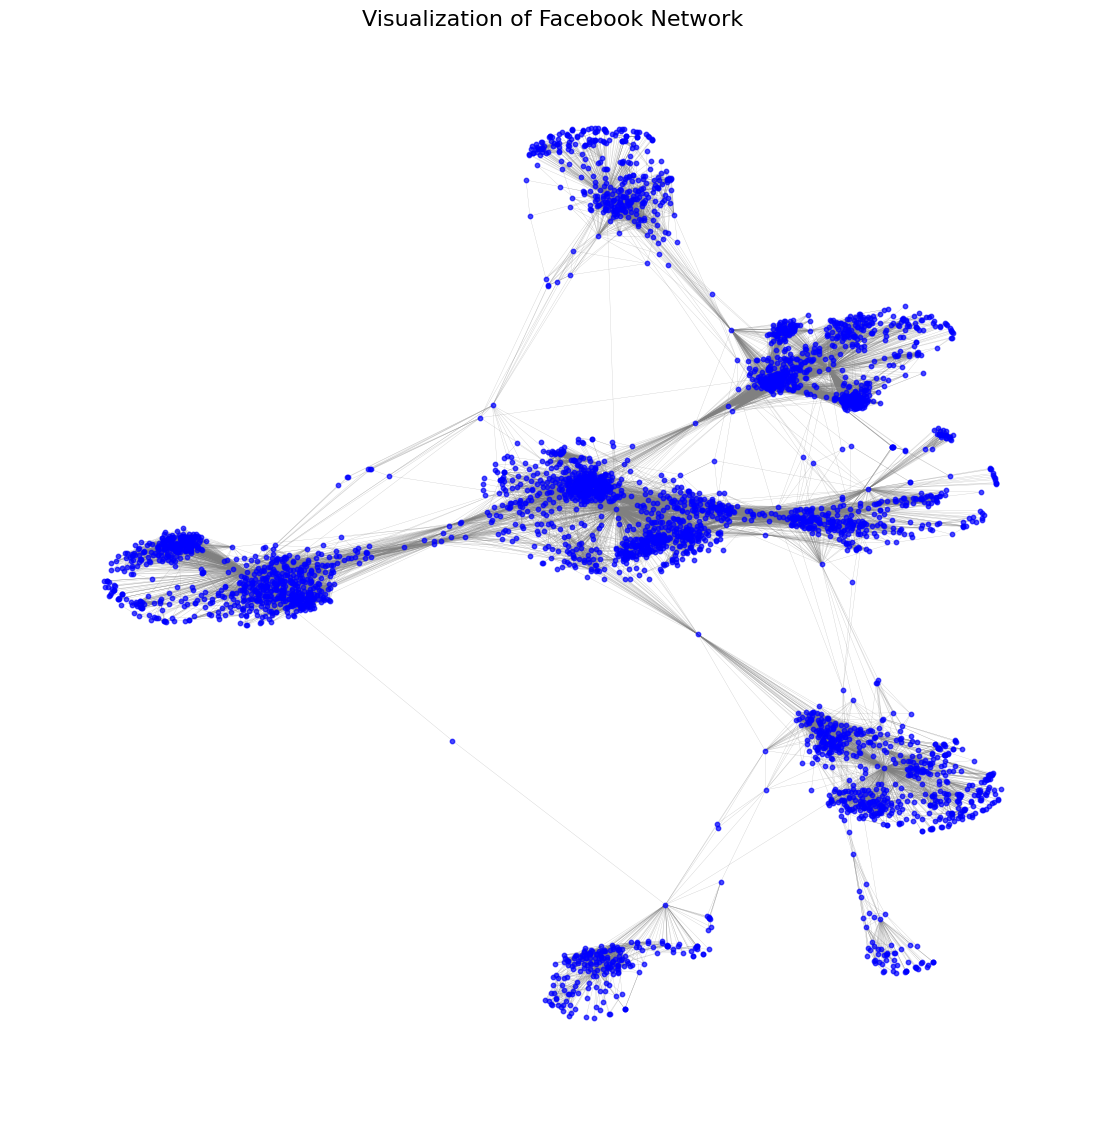

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# 加载数据并构建图
file_path = './facebook_combined.txt'  # 确保路径指向数据文件
G = nx.read_edgelist(file_path, nodetype=int)

# 使用 spring_layout 布局进行全图可视化
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, seed=42)  # 使用 spring_layout 布局
nx.draw_networkx_nodes(G, pos, node_size=10, node_color="blue", alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5, width=0.2)
plt.title("Visualization of Facebook Network", fontsize=16)
plt.axis("off")
plt.show()
